## Muhammad Danish | cs182019 | 7A 

## train images

In [1]:
import gzip
f = gzip.open('train-images-idx3-ubyte.gz','r')

image_size = 28
num_train_images = 60000

import numpy as np
f.read(16)
buf = f.read(image_size * image_size * num_train_images)
train_data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
train_data = train_data.reshape(num_train_images, image_size, image_size, 1)

In [2]:
print(len(train_data))
print(type(train_data))
# print(train_data[0])
print(len(train_data[0][27]))

60000
<class 'numpy.ndarray'>
28


## train labels

In [3]:
f = gzip.open('train-labels-idx1-ubyte.gz','r')
f.read(8)
train_labels =[]
for i in range(0,60000):   
    buf = f.read(1)
    train_labels.append(np.frombuffer(buf, dtype=np.uint8).astype(np.int64))
#     print(labels)

In [4]:
print(len(train_labels))

60000


## test images

In [5]:
test_image_gzip = gzip.open('t10k-images-idx3-ubyte.gz','r')

image_size = 28
num_test_images = 10000

test_image_gzip.read(16)
buf_test_image_gzip = test_image_gzip.read(image_size * image_size * num_test_images)
test_data = np.frombuffer(buf_test_image_gzip, dtype=np.uint8).astype(np.float32)
test_data = test_data.reshape(num_test_images, image_size, image_size, 1)

In [6]:
print(len(test_data))
print(type(test_data))
# print(train_data[0])
print(len(test_data[0][27]))

10000
<class 'numpy.ndarray'>
28


## test labels

In [7]:
f_test_labels = gzip.open('t10k-labels-idx1-ubyte.gz','r')
f_test_labels.read(8)
test_labels =[]
for i in range(0,10000):   
    buf_test_labels = f_test_labels.read(1)
    test_labels.append(np.frombuffer(buf_test_labels, dtype=np.uint8).astype(np.int64))
#     print(labels)

In [8]:
print(len(test_labels))

10000


## first five train labels

In [9]:
for i in range(5):
    print(train_labels[i])

[5]
[0]
[4]
[1]
[9]


## train images visualization

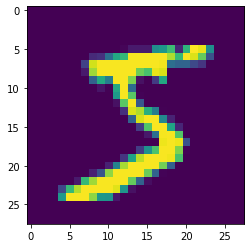

In [10]:
import matplotlib.pyplot as plt
image = np.asarray(train_data[0]).squeeze()
plt.imshow(image)
plt.show()

## first five test labels

In [11]:
for i in range(5):
    print(test_labels[i])

[7]
[2]
[1]
[0]
[4]


## train images visualization

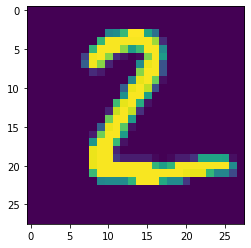

In [12]:
import matplotlib.pyplot as plt
image = np.asarray(test_data[1]).squeeze()
plt.imshow(image)
plt.show()

## Imports

In [13]:
# %tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

## Dataset

For this tutorial we will use the MNIST hand-written Dataset.
This is a database for handwritten digit classification, used in the Deep Learning chapter 18.
Each greyscale image is 28 x 28, representing the digits 0-9.
This dataset is large, consisting of 60,000 training images and 10,000 test images..

In [14]:
train_data.shape

(60000, 28, 28, 1)

In [15]:
test_data.shape

(10000, 28, 28, 1)

In [16]:
print(len(train_labels))

60000


In [17]:
print(len(test_labels))

10000


In [18]:
train_labels[:10]  # let's have a look at the first 10 training labels

[array([5], dtype=int64),
 array([0], dtype=int64),
 array([4], dtype=int64),
 array([1], dtype=int64),
 array([9], dtype=int64),
 array([2], dtype=int64),
 array([1], dtype=int64),
 array([3], dtype=int64),
 array([1], dtype=int64),
 array([4], dtype=int64)]

In [19]:
test_labels[:10]  # let's have a look at the first 10 testing labels

[array([7], dtype=int64),
 array([2], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64),
 array([4], dtype=int64),
 array([1], dtype=int64),
 array([4], dtype=int64),
 array([9], dtype=int64),
 array([5], dtype=int64),
 array([9], dtype=int64)]

## Data Preprocessing
The last step before creating our model is to *preprocess* our data. This simply means applying some prior transformations to our data before feeding it the model. In this case we will simply scale all our greyscale pixel values (0-255) to be between 0 and 1. We can do this by dividing each value in the training and testing sets by 255.0. We do this because smaller values will make it easier for the model to process our values. 



In [20]:
train_data = train_data / 255.0

test_data = test_data / 255.0

## Building the Model
Now it's time to build the model! We are going to use a keras *sequential* model with three different layers. This model represents a feed-forward neural network (one that passes values from left to right). We'll break down each layer and its architecture below.

In [21]:
import keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

**Layer 1:** This is our input layer and it will conist of 784 neurons. We use the flatten layer with an input shape of (28,28) to denote that our input should come in in that shape. The flatten means that our layer will reshape the shape (28,28) array into a vector of 784 neurons so that each pixel will be associated with one neuron.

**Layer 2:** This is our first and only hidden layer. The *dense* denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unit activation function.

**Layer 3:** This is our output later and is also a dense layer. It has 10 neurons that we will look at to determine our models output. Each neuron represnts the probabillity of a given image being one of the 10 different classes. The activation function *softmax* is used on this layer to calculate a probabillity distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probabillity of the image being that class.

## Compile the Model
The last step in building the model is to define the loss function, optimizer and metrics we would like to track. I won't go into detail about why we chose each of these right now.

In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
print(len(train_data))
print(len(train_labels))

60000
60000


## Training the Model
Now it's finally time to train the model. Since we've already done all the work on our data this step is as easy as calling a single method.

In [24]:
model.fit(np.array(train_data), np.array(train_labels), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2633 - accuracy: 0.9237
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1169 - accuracy: 0.9653
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0793 - accuracy: 0.9768
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0597 - accuracy: 0.9819
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0453 - accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0365 - accuracy: 0.9888
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0287 - accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0226 - accuracy: 0.9927
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0199 - accuracy: 0.9938
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.014

## Evaluating the Model
Now it's time to test/evaluate the model. We can do this quite easily using another builtin method from keras.

The *verbose* argument is defined from the keras documentation as:
"verbose: 0 or 1. Verbosity mode. 0 = silent, 1 = progress bar."
(https://keras.io/models/sequential/)

In [25]:
test_loss, test_acc = model.evaluate(np.array(test_data),  np.array(test_labels), verbose=1) 

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.0843 - accuracy: 0.9784
Test loss: 0.08431787043809891
Test accuracy: 0.9783999919891357


You'll likely notice that the accuracy here is lower than when training the model. This difference is reffered to as **overfitting**.

And now we have a trained model that's ready to use to predict some values!

## Making Predictions
To make predictions we simply need to pass an array of data in the form we've specified in the input layer to ```.predict()``` method.

In [26]:
predictions = model.predict(np.array(test_data))

This method returns to us an array of predictions for each image we passed it. Let's have a look at the predictions for image 1.

In [27]:
print(test_data[1].flatten())
print(predictions[1])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.45490196 0.49019608
 0.67058825 1.         1.         0.5882353  0.3

If we wan't to get the value with the highest score we can use a useful function from numpy called ```argmax()```. This simply returns the index of the maximium value from a numpy array. 

In [28]:
np.argmax(predictions[1])

2

And we can check if this is correct by looking at the value of the cooresponding test label.

In [29]:
test_labels[1]

array([2], dtype=int64)

## Verifying Predictions
I've written a small function here to help us verify predictions with some simple visuals.

Pick a number: 342
<--<-----ORIGINAL TEST PICTURE --->---->


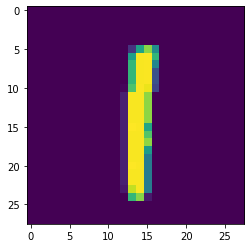

<---<---- ORIGINAL TEST LABEL ->------>
[1]

<------ PREDICTION ------> 
1


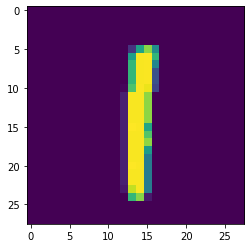

In [49]:
import matplotlib.pyplot as plt

def predict(model, image):
    prediction = model.predict(np.array([image]))
    predicted_class = np.argmax(prediction)
    print(predicted_class)
    show_image(image)


def show_image(img):
#     image = np.asarray(train_data[0]).squeeze()
    plt.imshow(img)
    plt.show()


def get_number():
    while True:
        num = input("Pick a number: ")
        if num.isdigit():
            num = int(num)
            if 0 <= num <= 9999:
                return int(num)
            else:
                print("Try again...")

num = get_number()
image = test_data[num]
label = test_labels[num]
print("<--<-----ORIGINAL TEST PICTURE --->---->")
plt.imshow(image)
plt.show()
print("<---<---- ORIGINAL TEST LABEL ->------>")
print(label)
print()
print("<------ PREDICTION ------> ")
predict(model, image)


And that's pretty much it for an introduction to neural networks!

## Sources

1. Doshi, Sanket. “Various Optimization Algorithms For Training Neural Network.” Medium, Medium, 10 Mar. 2019, www.medium.com/@sdoshi579/optimizers-for-training-neural-network-59450d71caf6.

2. “Basic Classification: Classify Images of Clothing &nbsp;: &nbsp; TensorFlow Core.” TensorFlow, www.tensorflow.org/tutorials/keras/classification.

3. “Keras: The Python Deep Learning Library.” Home - Keras Documentation, www.keras.io/.